In [10]:
import pandas as pd
import networkx as nx
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt


In [12]:
from google.colab import files
uploaded = files.upload()


Saving sent_gnss.csv to sent_gnss.csv


In [14]:
# CSV'yi oku
df = pd.read_csv("sent_gnss.csv")

# Sadece junction = 1 olan noktaları al
junctions = df[df['junction'] == 1.0][['latitude', 'longitude']].reset_index(drop=True)

# Komşuluk sayısı
k = 4

# En yakın komşularla bağlantı kurmak için model
nbrs = NearestNeighbors(n_neighbors=k + 1, algorithm='ball_tree').fit(junctions)
distances, indices = nbrs.kneighbors(junctions)


In [15]:
# Graph nesnesi oluştur
G = nx.Graph()

# Düğümleri ekle (index'i node ID, konumu pozisyon olarak kullan)
for idx, row in junctions.iterrows():
    G.add_node(idx, pos=(row['longitude'], row['latitude']))

# Her düğüm için en yakın k komşusuna kenar (bağlantı) ekle
for i, neighbors in enumerate(indices):
    for j in neighbors[1:]:  # ilk eleman kendisi, atla
        G.add_edge(i, j)

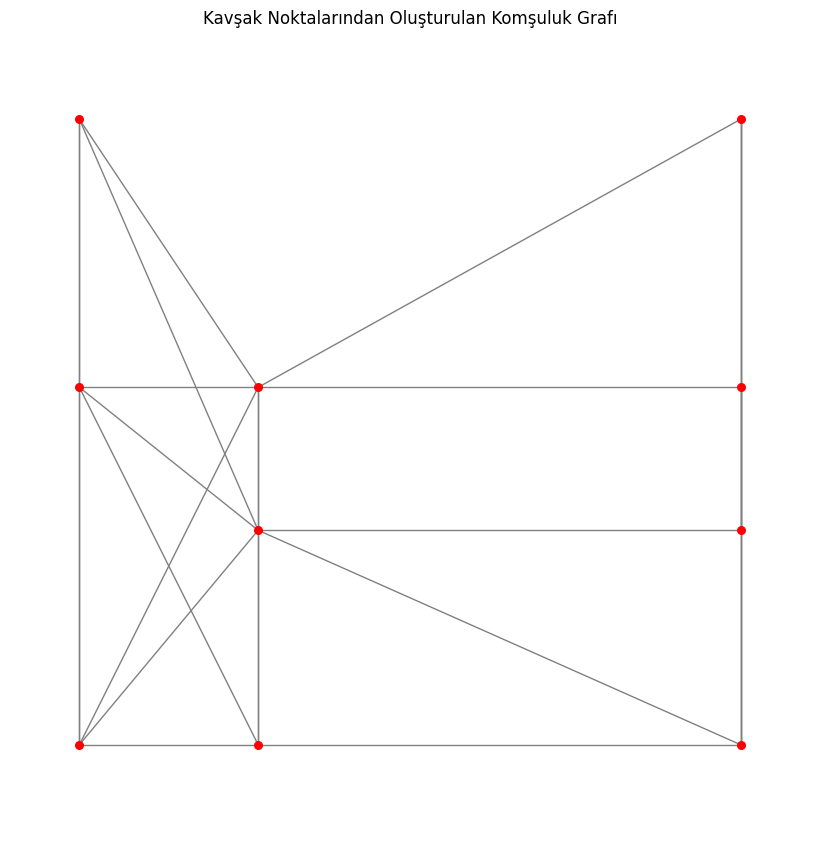

In [17]:
# Grafı çiz
pos = nx.get_node_attributes(G, 'pos')
plt.figure(figsize=(8, 8))
nx.draw(G, pos, node_size=30, node_color='red', edge_color='gray', with_labels=False)
plt.title("Kavşak Noktalarından Oluşturulan Komşuluk Grafı")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.axis("equal")
plt.show()